In [1]:
import pandas as pd
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import math

In [2]:
L = symbols('L')
L = 10
S = symbols('S')
S = 0
u = symbols('u')
u = 0.1
D = symbols('D')
D = 0.1
rho = symbols('rho')
rho = 1.18
Pe = symbols('Pe')
Pe = rho*u*L/D
Relx = 0.5
deltaX = 0.4
nodos = int(L/deltaX)
Bo = 1 # X = 0
Bl = 0 # X = L
##################################
a1 = Pe/L + 1/deltaX
b1 = Pe/L + 2/deltaX
a = 3*Pe/(8*L) + 2/deltaX
b = 1/deltaX - 3*Pe/(8*L)
c = 7 * Pe/(8*L)+1/deltaX
d = -1/8*(Pe/L)

In [3]:
initial = np.ones(nodos)
#initial = np.zeros(nodos)
#initial = np.insert(initial,0,1)
initial = np.append(initial, 0)
source = np.zeros(len(initial))
zeros = np.zeros(len(initial))
Relax = np.zeros(len(initial))

In [4]:
x = np.linspace(start = 0, stop = L, num=nodos+1, endpoint=True)

In [5]:
def IterPred(prediccion, inicial, source, orden):
    for i in range(len(inicial)):
        if (i==0):
            prediccion[i] = inicial[i]
        elif(i == 1):
            prediccion[i] = inicial[i+1]/(b1*deltaX) + inicial[i-1]*(a1/b1) + source[i]*deltaX/(b1*D)
        elif(i < len(inicial)-1 and orden == 2):
            prediccion[i] = b*inicial[i+1]/a + c*inicial[i-1]/a + d*inicial[i-2]/a + source[i]*(deltaX/a)
        elif(i < len(inicial)-1 and orden == 1):
            prediccion[i] = inicial[i+1]/(b1*deltaX) + inicial[i-1]*(a1/b1) + source[i]*deltaX/(b1*D)
        elif(i==len(inicial)):
            prediccion[i] = inicial[i]
    return prediccion;

In [6]:
def IterRelax(newRelax, prediccion, initial):
    for i in range(len(prediccion)):
        if (i == 0):
            newRelax[i] = prediccion[i]
        elif(i < len(prediccion)-1):
            newRelax[i] = initial[i] + Relx*(prediccion[i]-initial[i])
        elif(i == len(prediccion)):
            newRelax[i]= prediccion[i]
    return newRelax;

In [21]:
analitic = [] # Solucion analitica sin sources
for i in range(len(x)):
    anal = (Bl - Bo)* (exp(Pe*x[i]/L)-1) / (exp(Pe)-1) + Bo
    analitic.append(anal)

In [22]:
iterations = 1000

In [23]:
np.seterr(divide='ignore', invalid='ignore')
for ite in range(iterations):
    if (ite == 0):
        old = initial
        pred1 = IterPred(zeros,old, source, orden = 2)
        rlxResult = IterRelax(Relax, pred1, old)
        #print(old[0:4])
        #print(pred1[0:4])
        #print(rlxResult[0:4])
    else:
        #print('It '+str(ite))
        old = rlxResult
        #print(old[0:3])
        pred1 = IterPred(zeros,old, source, orden = 2)
        #print(pred1[0:3])
        if(ite == iterations-1):
            print('Residual = ' + str(np.nansum(np.divide(abs(pred1-old),abs(pred1)))))
        rlxResult = IterRelax(Relax, pred1, old)
        #print(rlxResult[0:3])

Residual = 6.436222039680127e-10


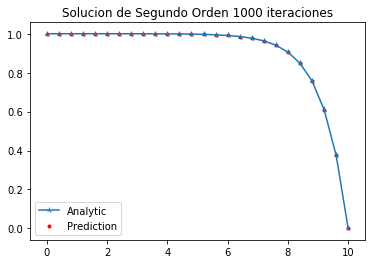

In [24]:
plt.plot(x, analitic, marker = '2', label = 'Analytic')
#plt.scatter(x, rlxResult, marker= 'x', s = 9, color = 'orange', label = 'Prediction')
plt.scatter(x, pred1, marker = 'o', s = 9, color = 'red', label = 'Prediction')
plt.title('Solucion de Segundo Orden '  + str(iterations) + ' iteraciones')
plt.legend()
plt.show()

In [25]:
for ite in range(iterations):
    if (ite == 0):
        old = initial
        pred1 = IterPred(zeros,initial, source, orden = 1)
        rlxResult = IterRelax(Relax, pred1, initial)
    else:
        old = rlxResult
        pred1 = IterPred(zeros,old, source, orden = 1)
        rlxResult = IterRelax(Relax, pred1, old)
        if(ite == iterations-1):
            print('Residual = ' + str(np.nansum(np.divide(abs(pred1-old),abs(pred1)))))

Residual = 1.4406117459084558e-08


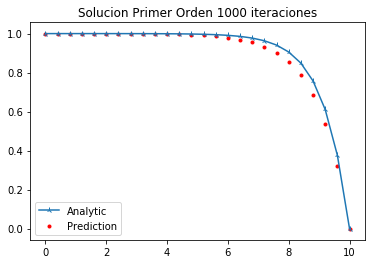

In [26]:
plt.scatter(x, pred1, marker = 'o', s = 9, color = 'red', label = 'Prediction')
plt.plot(x, analitic, marker = '2', label = 'Analytic')
plt.title('Solucion Primer Orden ' + str(iterations) + ' iteraciones')
plt.legend()
plt.show()